**CNN**
- Padding,Filter Size and stride
- Lenet 5 architecture

The output from a convolution filter depends on the input size, kernel size, padding and stride. The relationship is:
$O=\frac{(I-K+2P)}{S}+1$ (https://adeshpande3.github.io/A-Beginner%27s-Guide-To-Understanding-Convolutional-Neural-Networks-Part-2/ )

With this in mind we will create a model for very common CNN architecture known as Lenet5 (https://engmrk.com/lenet-5-a-classic-cnn-architecture/)

In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader,Dataset
from torch import optim
import pandas as pd

In [2]:
mnist_train=pd.read_csv("data/mnist_train.csv")
mnist_test=pd.read_csv("data/mnist_test.csv")

In [3]:
mnist_train.head(2)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
def O(I,K,P,S):
    return ((I-K+2*P)/(S))+1

In [5]:
O(28,5,0,1)

24.0

In [6]:
O(24,2,0,2)

12.0

In [7]:
O(12,5,0,1)

8.0

In [8]:
O(8,2,0,2)

4.0

In [9]:
########### Define Model #########
class Lenet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1=nn.Conv2d(in_channels=1,out_channels=6,padding=0,stride=1,kernel_size=(5,5))
        self.pool1=nn.MaxPool2d(kernel_size=(2,2),padding=0,stride=2)
        self.conv2=nn.Conv2d(in_channels=6,out_channels=16,padding=0,stride=1,kernel_size=(5,5))
        self.pool2=nn.MaxPool2d(kernel_size=(2,2),padding=0,stride=2)
        self.linear1=nn.Linear(4*4*16,120)
        self.linear2=nn.Linear(120,84)
        self.linear3=nn.Linear(84,10)
    def forward(self,X):
        x=self.conv1(X)
        x=nn.functional.tanh(x)
        x=self.pool1(x)
        x=self.conv2(x)
        x=nn.functional.tanh(x)
        x=self.pool2(x)
        x=x.view(-1,16*4*4)
        x=self.linear1(x)
        x=nn.functional.tanh(x)
        x=self.linear2(x)
        x=nn.functional.tanh(x)
        x=self.linear3(x)
        x=nn.functional.softmax(x,dim=1)
        return x        

In [10]:
mod=Lenet()

In [11]:
class Mnist(Dataset):
    def __init__(self,X,y):
        self.X=X
        self.y=y
    def __len__(self):
        return len(self.y)
    def __getitem__(self,idx):
        X=self.X[idx,].reshape((28,28))
        y=self.y[idx]
        batch={'X':X,'y':y}
        return batch

In [12]:
X=mnist_train.drop('label',axis=1).values
y=mnist_train['label'].values
mnist=Mnist(X,y)

In [13]:
data=DataLoader(mnist,batch_size=128,shuffle=True)

In [14]:
criterion=nn.CrossEntropyLoss()

In [15]:
opt=optim.Adam(mod.parameters(),lr=0.001)

In [16]:
num_epochs=4
Losses=[]
for i in range(num_epochs):
    for j,batch in enumerate(data):
        X=batch['X'].float()
        X=X.reshape(-1,1,28,28)
        y=batch['y'].long()
        probs=mod(X)
        loss=criterion(probs,y)
        Losses.append(loss.item())
        loss.backward()
        acc=(probs.argmax(axis=1)==y).float().mean().item()
        print(f"Epoch {i+1}, iter {j+1}, acc {round(acc,2)}, loss {round(loss.item(),2)}")
        opt.step()
        opt.zero_grad()

/Users/gunnvantsaini/miniconda3/envs/tensorflow/lib/python3.7/site-packages/torch/nn/functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/Users/gunnvantsaini/miniconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch 1, iter 1, acc 0.07, loss 2.31
Epoch 1, iter 2, acc 0.15, loss 2.3
Epoch 1, iter 3, acc 0.23, loss 2.3
Epoch 1, iter 4, acc 0.39, loss 2.29
Epoch 1, iter 5, acc 0.45, loss 2.29
Epoch 1, iter 6, acc 0.38, loss 2.29
Epoch 1, iter 7, acc 0.38, loss 2.29
Epoch 1, iter 8, acc 0.38, loss 2.28
Epoch 1, iter 9, acc 0.48, loss 2.27
Epoch 1, iter 10, acc 0.47, loss 2.27
Epoch 1, iter 11, acc 0.43, loss 2.27
Epoch 1, iter 12, acc 0.45, loss 2.25
Epoch 1, iter 13, acc 0.49, loss 2.24
Epoch 1, iter 14, acc 0.45, loss 2.23
Epoch 1, iter 15, acc 0.45, loss 2.22
Epoch 1, iter 16, acc 0.53, loss 2.2
Epoch 1, iter 17, acc 0.43, loss 2.18
Epoch 1, iter 18, acc 0.52, loss 2.17
Epoch 1, iter 19, acc 0.52, loss 2.16
Epoch 1, iter 20, acc 0.7, loss 2.11
Epoch 1, iter 21, acc 0.55, loss 2.1
Epoch 1, iter 22, acc 0.57, loss 2.1
Epoch 1, iter 23, acc 0.55, loss 2.09
Epoch 1, iter 24, acc 0.5, loss 2.08
Epoch 1, iter 25, acc 0.63, loss 2.06
Epoch 1, iter 26, acc 0.64, loss 2.02
Epoch 1, iter 27, acc 0.73, 

Epoch 1, iter 216, acc 0.95, loss 1.52
Epoch 1, iter 217, acc 0.96, loss 1.51
Epoch 1, iter 218, acc 0.98, loss 1.5
Epoch 1, iter 219, acc 0.96, loss 1.51
Epoch 1, iter 220, acc 0.92, loss 1.54
Epoch 1, iter 221, acc 0.98, loss 1.5
Epoch 1, iter 222, acc 0.94, loss 1.53
Epoch 1, iter 223, acc 0.98, loss 1.5
Epoch 1, iter 224, acc 0.97, loss 1.5
Epoch 1, iter 225, acc 0.97, loss 1.5
Epoch 1, iter 226, acc 0.95, loss 1.53
Epoch 1, iter 227, acc 0.94, loss 1.54
Epoch 1, iter 228, acc 0.95, loss 1.53
Epoch 1, iter 229, acc 0.99, loss 1.49
Epoch 1, iter 230, acc 0.94, loss 1.53
Epoch 1, iter 231, acc 0.97, loss 1.5
Epoch 1, iter 232, acc 0.98, loss 1.49
Epoch 1, iter 233, acc 0.95, loss 1.51
Epoch 1, iter 234, acc 0.97, loss 1.5
Epoch 1, iter 235, acc 0.99, loss 1.48
Epoch 1, iter 236, acc 0.96, loss 1.52
Epoch 1, iter 237, acc 0.96, loss 1.51
Epoch 1, iter 238, acc 0.95, loss 1.52
Epoch 1, iter 239, acc 0.95, loss 1.53
Epoch 1, iter 240, acc 0.98, loss 1.49
Epoch 1, iter 241, acc 0.95, los

Epoch 2, iter 102, acc 0.93, loss 1.54
Epoch 2, iter 103, acc 0.95, loss 1.52
Epoch 2, iter 104, acc 0.96, loss 1.52
Epoch 2, iter 105, acc 0.98, loss 1.49
Epoch 2, iter 106, acc 0.98, loss 1.49
Epoch 2, iter 107, acc 0.96, loss 1.51
Epoch 2, iter 108, acc 0.98, loss 1.49
Epoch 2, iter 109, acc 0.95, loss 1.52
Epoch 2, iter 110, acc 0.96, loss 1.5
Epoch 2, iter 111, acc 0.96, loss 1.51
Epoch 2, iter 112, acc 0.95, loss 1.51
Epoch 2, iter 113, acc 0.96, loss 1.5
Epoch 2, iter 114, acc 0.95, loss 1.51
Epoch 2, iter 115, acc 0.96, loss 1.5
Epoch 2, iter 116, acc 0.96, loss 1.5
Epoch 2, iter 117, acc 0.98, loss 1.48
Epoch 2, iter 118, acc 0.98, loss 1.49
Epoch 2, iter 119, acc 0.95, loss 1.51
Epoch 2, iter 120, acc 0.97, loss 1.5
Epoch 2, iter 121, acc 0.98, loss 1.49
Epoch 2, iter 122, acc 0.96, loss 1.51
Epoch 2, iter 123, acc 0.98, loss 1.48
Epoch 2, iter 124, acc 0.98, loss 1.49
Epoch 2, iter 125, acc 0.95, loss 1.52
Epoch 2, iter 126, acc 0.97, loss 1.5
Epoch 2, iter 127, acc 0.98, lo

Epoch 2, iter 315, acc 0.97, loss 1.49
Epoch 2, iter 316, acc 0.98, loss 1.49
Epoch 2, iter 317, acc 0.97, loss 1.49
Epoch 2, iter 318, acc 0.97, loss 1.49
Epoch 2, iter 319, acc 0.98, loss 1.5
Epoch 2, iter 320, acc 0.98, loss 1.48
Epoch 2, iter 321, acc 0.98, loss 1.49
Epoch 2, iter 322, acc 0.98, loss 1.49
Epoch 2, iter 323, acc 0.99, loss 1.48
Epoch 2, iter 324, acc 0.98, loss 1.48
Epoch 2, iter 325, acc 0.96, loss 1.49
Epoch 2, iter 326, acc 0.99, loss 1.48
Epoch 2, iter 327, acc 0.98, loss 1.49
Epoch 2, iter 328, acc 0.97, loss 1.5
Epoch 2, iter 329, acc 1.0, loss 1.46
Epoch 3, iter 1, acc 0.98, loss 1.49
Epoch 3, iter 2, acc 0.98, loss 1.49
Epoch 3, iter 3, acc 0.98, loss 1.49
Epoch 3, iter 4, acc 0.98, loss 1.48
Epoch 3, iter 5, acc 0.95, loss 1.52
Epoch 3, iter 6, acc 0.98, loss 1.48
Epoch 3, iter 7, acc 0.98, loss 1.49
Epoch 3, iter 8, acc 0.97, loss 1.49
Epoch 3, iter 9, acc 0.99, loss 1.47
Epoch 3, iter 10, acc 0.99, loss 1.48
Epoch 3, iter 11, acc 0.99, loss 1.47
Epoch 3, 

Epoch 3, iter 201, acc 0.97, loss 1.49
Epoch 3, iter 202, acc 0.96, loss 1.5
Epoch 3, iter 203, acc 0.94, loss 1.52
Epoch 3, iter 204, acc 0.99, loss 1.47
Epoch 3, iter 205, acc 0.97, loss 1.49
Epoch 3, iter 206, acc 0.99, loss 1.47
Epoch 3, iter 207, acc 0.99, loss 1.48
Epoch 3, iter 208, acc 0.98, loss 1.49
Epoch 3, iter 209, acc 0.95, loss 1.51
Epoch 3, iter 210, acc 0.99, loss 1.48
Epoch 3, iter 211, acc 0.98, loss 1.49
Epoch 3, iter 212, acc 0.98, loss 1.49
Epoch 3, iter 213, acc 0.95, loss 1.52
Epoch 3, iter 214, acc 0.98, loss 1.48
Epoch 3, iter 215, acc 0.97, loss 1.5
Epoch 3, iter 216, acc 0.98, loss 1.48
Epoch 3, iter 217, acc 0.95, loss 1.51
Epoch 3, iter 218, acc 0.97, loss 1.5
Epoch 3, iter 219, acc 1.0, loss 1.47
Epoch 3, iter 220, acc 0.96, loss 1.5
Epoch 3, iter 221, acc 0.96, loss 1.5
Epoch 3, iter 222, acc 0.98, loss 1.5
Epoch 3, iter 223, acc 0.97, loss 1.49
Epoch 3, iter 224, acc 0.96, loss 1.5
Epoch 3, iter 225, acc 0.97, loss 1.5
Epoch 3, iter 226, acc 0.98, loss 

Epoch 4, iter 88, acc 0.95, loss 1.51
Epoch 4, iter 89, acc 0.98, loss 1.48
Epoch 4, iter 90, acc 1.0, loss 1.46
Epoch 4, iter 91, acc 0.98, loss 1.49
Epoch 4, iter 92, acc 0.98, loss 1.48
Epoch 4, iter 93, acc 0.99, loss 1.48
Epoch 4, iter 94, acc 0.98, loss 1.48
Epoch 4, iter 95, acc 0.99, loss 1.47
Epoch 4, iter 96, acc 0.98, loss 1.48
Epoch 4, iter 97, acc 0.98, loss 1.48
Epoch 4, iter 98, acc 0.99, loss 1.48
Epoch 4, iter 99, acc 0.97, loss 1.49
Epoch 4, iter 100, acc 0.98, loss 1.49
Epoch 4, iter 101, acc 0.98, loss 1.48
Epoch 4, iter 102, acc 0.98, loss 1.48
Epoch 4, iter 103, acc 0.98, loss 1.48
Epoch 4, iter 104, acc 0.99, loss 1.47
Epoch 4, iter 105, acc 0.95, loss 1.51
Epoch 4, iter 106, acc 0.95, loss 1.5
Epoch 4, iter 107, acc 0.97, loss 1.5
Epoch 4, iter 108, acc 0.96, loss 1.49
Epoch 4, iter 109, acc 0.98, loss 1.49
Epoch 4, iter 110, acc 0.98, loss 1.48
Epoch 4, iter 111, acc 0.98, loss 1.48
Epoch 4, iter 112, acc 1.0, loss 1.47
Epoch 4, iter 113, acc 0.97, loss 1.5
Epo

Epoch 4, iter 300, acc 0.98, loss 1.48
Epoch 4, iter 301, acc 0.98, loss 1.48
Epoch 4, iter 302, acc 0.98, loss 1.48
Epoch 4, iter 303, acc 0.95, loss 1.51
Epoch 4, iter 304, acc 0.98, loss 1.49
Epoch 4, iter 305, acc 0.99, loss 1.47
Epoch 4, iter 306, acc 0.96, loss 1.51
Epoch 4, iter 307, acc 0.99, loss 1.47
Epoch 4, iter 308, acc 0.98, loss 1.48
Epoch 4, iter 309, acc 0.98, loss 1.48
Epoch 4, iter 310, acc 0.98, loss 1.49
Epoch 4, iter 311, acc 0.98, loss 1.49
Epoch 4, iter 312, acc 0.99, loss 1.47
Epoch 4, iter 313, acc 0.98, loss 1.48
Epoch 4, iter 314, acc 0.96, loss 1.5
Epoch 4, iter 315, acc 0.98, loss 1.48
Epoch 4, iter 316, acc 0.98, loss 1.48
Epoch 4, iter 317, acc 0.99, loss 1.48
Epoch 4, iter 318, acc 0.98, loss 1.49
Epoch 4, iter 319, acc 1.0, loss 1.46
Epoch 4, iter 320, acc 0.97, loss 1.49
Epoch 4, iter 321, acc 0.98, loss 1.49
Epoch 4, iter 322, acc 0.97, loss 1.49
Epoch 4, iter 323, acc 0.99, loss 1.47
Epoch 4, iter 324, acc 0.97, loss 1.49
Epoch 4, iter 325, acc 0.99

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

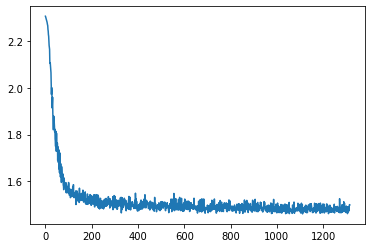

In [18]:
plt.plot(range(len(Losses)),Losses)

In [27]:
####### One can also use nn.sequential() to represent architectures better ######
class Lenet(nn.Module):
    def __init__(self):
        super().__init__()
        self.features=nn.Sequential(nn.Conv2d(in_channels=1,out_channels=6,padding=0,stride=1,kernel_size=(5,5)),
                                   nn.Tanh(),
                                   nn.MaxPool2d(kernel_size=(2,2),padding=0,stride=2),
                                   nn.Conv2d(in_channels=6,out_channels=16,padding=0,stride=1,kernel_size=(5,5)),
                                   nn.Tanh(),
                                   nn.MaxPool2d(kernel_size=(2,2),padding=0,stride=2))
        self.classifier=nn.Sequential(nn.Linear(4*4*16,120),
                                     nn.Tanh(),
                                     nn.Linear(120,84),
                                     nn.Tanh(),
                                     nn.Linear(84,10))
    def forward(self,X):
        X=self.features(X)
        X=X.view(-1,16*4*4)
        X=self.classifier(X)
        X=nn.functional.softmax(X,dim=1)
        return X

In [28]:
mod=Lenet()
opt=optim.Adam(mod.parameters(),lr=0.001)

In [29]:
criterion=nn.CrossEntropyLoss()

In [30]:
num_epochs=4
Losses=[]
for i in range(num_epochs):
    for j,batch in enumerate(data):
        X=batch['X'].float()
        X=X.reshape(-1,1,28,28)
        y=batch['y'].long()
        probs=mod(X)
        loss=criterion(probs,y)
        Losses.append(loss.item())
        loss.backward()
        acc=(probs.argmax(axis=1)==y).float().mean().item()
        print(f"Epoch {i+1}, iter {j+1}, acc {round(acc,2)}, loss {round(loss.item(),2)}")
        opt.step()
        opt.zero_grad()

Epoch 1, iter 1, acc 0.11, loss 2.3
Epoch 1, iter 2, acc 0.14, loss 2.3
Epoch 1, iter 3, acc 0.1, loss 2.3
Epoch 1, iter 4, acc 0.05, loss 2.3
Epoch 1, iter 5, acc 0.09, loss 2.29
Epoch 1, iter 6, acc 0.19, loss 2.29
Epoch 1, iter 7, acc 0.45, loss 2.28
Epoch 1, iter 8, acc 0.46, loss 2.28
Epoch 1, iter 9, acc 0.47, loss 2.27
Epoch 1, iter 10, acc 0.48, loss 2.26
Epoch 1, iter 11, acc 0.47, loss 2.26
Epoch 1, iter 12, acc 0.52, loss 2.24
Epoch 1, iter 13, acc 0.51, loss 2.23
Epoch 1, iter 14, acc 0.49, loss 2.23
Epoch 1, iter 15, acc 0.51, loss 2.21
Epoch 1, iter 16, acc 0.54, loss 2.19
Epoch 1, iter 17, acc 0.52, loss 2.17
Epoch 1, iter 18, acc 0.55, loss 2.14
Epoch 1, iter 19, acc 0.55, loss 2.14
Epoch 1, iter 20, acc 0.54, loss 2.11
Epoch 1, iter 21, acc 0.57, loss 2.1
Epoch 1, iter 22, acc 0.56, loss 2.08
Epoch 1, iter 23, acc 0.49, loss 2.07
Epoch 1, iter 24, acc 0.55, loss 2.05
Epoch 1, iter 25, acc 0.49, loss 2.07
Epoch 1, iter 26, acc 0.63, loss 2.0
Epoch 1, iter 27, acc 0.59, 

Epoch 1, iter 217, acc 0.93, loss 1.54
Epoch 1, iter 218, acc 0.95, loss 1.52
Epoch 1, iter 219, acc 0.94, loss 1.53
Epoch 1, iter 220, acc 0.94, loss 1.55
Epoch 1, iter 221, acc 0.95, loss 1.52
Epoch 1, iter 222, acc 0.96, loss 1.51
Epoch 1, iter 223, acc 0.93, loss 1.55
Epoch 1, iter 224, acc 0.92, loss 1.55
Epoch 1, iter 225, acc 0.98, loss 1.51
Epoch 1, iter 226, acc 0.95, loss 1.51
Epoch 1, iter 227, acc 0.93, loss 1.55
Epoch 1, iter 228, acc 0.95, loss 1.52
Epoch 1, iter 229, acc 0.94, loss 1.54
Epoch 1, iter 230, acc 0.98, loss 1.51
Epoch 1, iter 231, acc 0.95, loss 1.52
Epoch 1, iter 232, acc 0.95, loss 1.53
Epoch 1, iter 233, acc 0.95, loss 1.53
Epoch 1, iter 234, acc 0.91, loss 1.55
Epoch 1, iter 235, acc 0.95, loss 1.53
Epoch 1, iter 236, acc 0.98, loss 1.51
Epoch 1, iter 237, acc 0.95, loss 1.52
Epoch 1, iter 238, acc 0.96, loss 1.52
Epoch 1, iter 239, acc 0.93, loss 1.55
Epoch 1, iter 240, acc 0.94, loss 1.53
Epoch 1, iter 241, acc 0.96, loss 1.51
Epoch 1, iter 242, acc 0.

Epoch 2, iter 104, acc 0.96, loss 1.51
Epoch 2, iter 105, acc 0.95, loss 1.5
Epoch 2, iter 106, acc 0.97, loss 1.51
Epoch 2, iter 107, acc 0.95, loss 1.51
Epoch 2, iter 108, acc 0.96, loss 1.5
Epoch 2, iter 109, acc 0.99, loss 1.48
Epoch 2, iter 110, acc 0.98, loss 1.48
Epoch 2, iter 111, acc 0.97, loss 1.5
Epoch 2, iter 112, acc 0.97, loss 1.5
Epoch 2, iter 113, acc 0.95, loss 1.51
Epoch 2, iter 114, acc 0.97, loss 1.5
Epoch 2, iter 115, acc 0.98, loss 1.48
Epoch 2, iter 116, acc 0.98, loss 1.49
Epoch 2, iter 117, acc 0.95, loss 1.51
Epoch 2, iter 118, acc 0.96, loss 1.51
Epoch 2, iter 119, acc 0.98, loss 1.49
Epoch 2, iter 120, acc 0.95, loss 1.53
Epoch 2, iter 121, acc 0.98, loss 1.49
Epoch 2, iter 122, acc 0.99, loss 1.47
Epoch 2, iter 123, acc 0.97, loss 1.5
Epoch 2, iter 124, acc 0.96, loss 1.5
Epoch 2, iter 125, acc 0.96, loss 1.51
Epoch 2, iter 126, acc 0.97, loss 1.5
Epoch 2, iter 127, acc 0.98, loss 1.49
Epoch 2, iter 128, acc 0.98, loss 1.49
Epoch 2, iter 129, acc 0.97, loss

Epoch 2, iter 319, acc 0.97, loss 1.49
Epoch 2, iter 320, acc 0.97, loss 1.48
Epoch 2, iter 321, acc 0.97, loss 1.49
Epoch 2, iter 322, acc 0.93, loss 1.53
Epoch 2, iter 323, acc 0.98, loss 1.49
Epoch 2, iter 324, acc 0.97, loss 1.5
Epoch 2, iter 325, acc 0.97, loss 1.49
Epoch 2, iter 326, acc 0.97, loss 1.49
Epoch 2, iter 327, acc 0.99, loss 1.49
Epoch 2, iter 328, acc 0.98, loss 1.48
Epoch 2, iter 329, acc 0.94, loss 1.52
Epoch 3, iter 1, acc 0.94, loss 1.52
Epoch 3, iter 2, acc 0.96, loss 1.5
Epoch 3, iter 3, acc 0.97, loss 1.5
Epoch 3, iter 4, acc 0.98, loss 1.48
Epoch 3, iter 5, acc 0.98, loss 1.5
Epoch 3, iter 6, acc 0.95, loss 1.51
Epoch 3, iter 7, acc 0.98, loss 1.48
Epoch 3, iter 8, acc 0.98, loss 1.49
Epoch 3, iter 9, acc 0.97, loss 1.49
Epoch 3, iter 10, acc 0.98, loss 1.48
Epoch 3, iter 11, acc 0.99, loss 1.48
Epoch 3, iter 12, acc 0.96, loss 1.5
Epoch 3, iter 13, acc 0.98, loss 1.48
Epoch 3, iter 14, acc 0.97, loss 1.49
Epoch 3, iter 15, acc 0.95, loss 1.51
Epoch 3, iter 1

Epoch 3, iter 205, acc 0.98, loss 1.49
Epoch 3, iter 206, acc 0.98, loss 1.48
Epoch 3, iter 207, acc 0.99, loss 1.48
Epoch 3, iter 208, acc 0.98, loss 1.49
Epoch 3, iter 209, acc 0.99, loss 1.47
Epoch 3, iter 210, acc 0.97, loss 1.5
Epoch 3, iter 211, acc 0.96, loss 1.5
Epoch 3, iter 212, acc 0.97, loss 1.5
Epoch 3, iter 213, acc 0.98, loss 1.48
Epoch 3, iter 214, acc 0.96, loss 1.51
Epoch 3, iter 215, acc 0.95, loss 1.51
Epoch 3, iter 216, acc 0.98, loss 1.48
Epoch 3, iter 217, acc 0.98, loss 1.49
Epoch 3, iter 218, acc 0.99, loss 1.48
Epoch 3, iter 219, acc 0.98, loss 1.48
Epoch 3, iter 220, acc 0.94, loss 1.52
Epoch 3, iter 221, acc 0.96, loss 1.49
Epoch 3, iter 222, acc 0.96, loss 1.51
Epoch 3, iter 223, acc 0.98, loss 1.49
Epoch 3, iter 224, acc 0.98, loss 1.48
Epoch 3, iter 225, acc 0.98, loss 1.48
Epoch 3, iter 226, acc 0.98, loss 1.48
Epoch 3, iter 227, acc 0.98, loss 1.49
Epoch 3, iter 228, acc 0.97, loss 1.5
Epoch 3, iter 229, acc 0.98, loss 1.49
Epoch 3, iter 230, acc 1.0, l

Epoch 4, iter 93, acc 0.99, loss 1.47
Epoch 4, iter 94, acc 0.98, loss 1.49
Epoch 4, iter 95, acc 0.98, loss 1.49
Epoch 4, iter 96, acc 0.98, loss 1.48
Epoch 4, iter 97, acc 0.98, loss 1.48
Epoch 4, iter 98, acc 0.98, loss 1.48
Epoch 4, iter 99, acc 0.95, loss 1.51
Epoch 4, iter 100, acc 0.98, loss 1.49
Epoch 4, iter 101, acc 0.97, loss 1.49
Epoch 4, iter 102, acc 0.98, loss 1.48
Epoch 4, iter 103, acc 0.99, loss 1.47
Epoch 4, iter 104, acc 0.98, loss 1.48
Epoch 4, iter 105, acc 0.97, loss 1.49
Epoch 4, iter 106, acc 0.98, loss 1.48
Epoch 4, iter 107, acc 0.98, loss 1.48
Epoch 4, iter 108, acc 0.98, loss 1.48
Epoch 4, iter 109, acc 0.98, loss 1.49
Epoch 4, iter 110, acc 0.98, loss 1.49
Epoch 4, iter 111, acc 0.98, loss 1.5
Epoch 4, iter 112, acc 0.98, loss 1.49
Epoch 4, iter 113, acc 0.99, loss 1.47
Epoch 4, iter 114, acc 1.0, loss 1.47
Epoch 4, iter 115, acc 0.94, loss 1.52
Epoch 4, iter 116, acc 0.99, loss 1.48
Epoch 4, iter 117, acc 1.0, loss 1.47
Epoch 4, iter 118, acc 0.98, loss 1

Epoch 4, iter 306, acc 0.99, loss 1.47
Epoch 4, iter 307, acc 0.99, loss 1.47
Epoch 4, iter 308, acc 0.95, loss 1.52
Epoch 4, iter 309, acc 0.98, loss 1.48
Epoch 4, iter 310, acc 1.0, loss 1.47
Epoch 4, iter 311, acc 0.98, loss 1.49
Epoch 4, iter 312, acc 0.96, loss 1.5
Epoch 4, iter 313, acc 0.98, loss 1.49
Epoch 4, iter 314, acc 0.98, loss 1.49
Epoch 4, iter 315, acc 0.99, loss 1.47
Epoch 4, iter 316, acc 0.96, loss 1.5
Epoch 4, iter 317, acc 0.98, loss 1.48
Epoch 4, iter 318, acc 0.95, loss 1.51
Epoch 4, iter 319, acc 0.98, loss 1.48
Epoch 4, iter 320, acc 0.98, loss 1.48
Epoch 4, iter 321, acc 0.98, loss 1.49
Epoch 4, iter 322, acc 0.97, loss 1.49
Epoch 4, iter 323, acc 0.98, loss 1.49
Epoch 4, iter 324, acc 0.99, loss 1.47
Epoch 4, iter 325, acc 0.99, loss 1.47
Epoch 4, iter 326, acc 0.99, loss 1.47
Epoch 4, iter 327, acc 0.99, loss 1.47
Epoch 4, iter 328, acc 0.98, loss 1.48
Epoch 4, iter 329, acc 1.0, loss 1.47


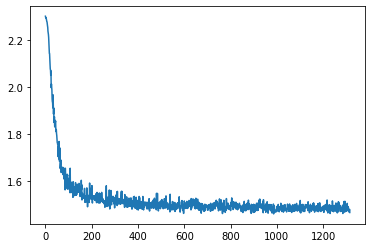

In [31]:
plt.plot(range(len(Losses)),Losses)